In [1]:
import pandas as pd

train_data = pd.read_csv('../data/train.csv')

# Basic info and structure
train_data.info()
train_data.head(10)

# Checking missing values
train_data.isnull().sum()

# Checking duplicates
train_data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


np.int64(0)

Data Overview from above columns:
1. The dataset contains id, text, location, keyword, and target columns.
2. The text column is the primary feature, and target is the label (1 = real disaster, 0 = not a disaster).
3. We observe missing values in location and keyword so that we can decide later how to handle them.
4. We also check for duplicate rows to avoid redundancy in training.

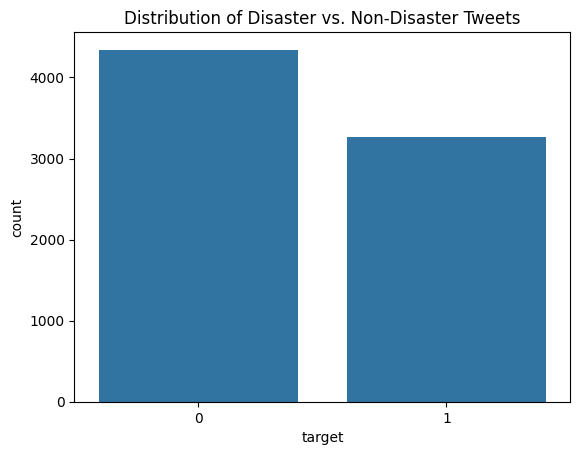

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=train_data)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.show()


Target Distribution:

1. The target classes are slightly imbalanced, with more non-disaster (0) tweets than real disaster (1) tweets.
2. This imbalance suggests we may need to address class imbalance through techniques like class weights or oversampling/undersampling after the first training run.

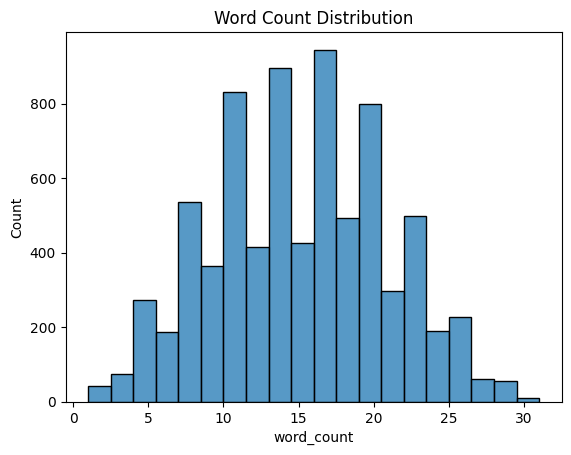

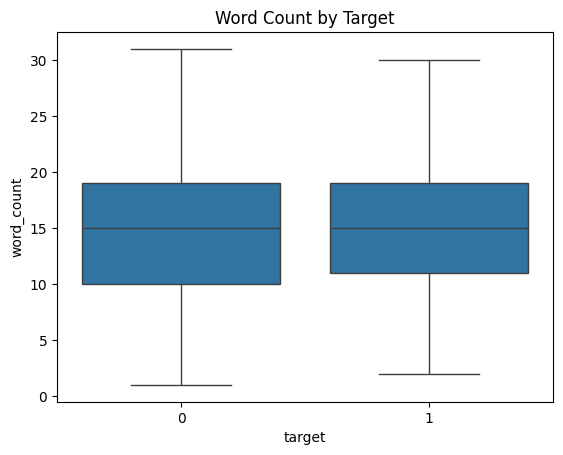

In [11]:
# Word count and text length
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))
train_data['char_count'] = train_data['text'].apply(lambda x: len(str(x)))

# Visualize word count distribution
sns.histplot(train_data['word_count'], bins=20)
plt.title('Word Count Distribution')
plt.show()

# Boxplot of word count by target
sns.boxplot(x='target', y='word_count', data=train_data)
plt.title('Word Count by Target')
plt.show()


Text Characteristics:

1. Most tweets contain fewer than 20 words — a typical behavior for tweets.
2. Word count distribution for both target values is almost same. It suggests we can't use word count as a feature. 

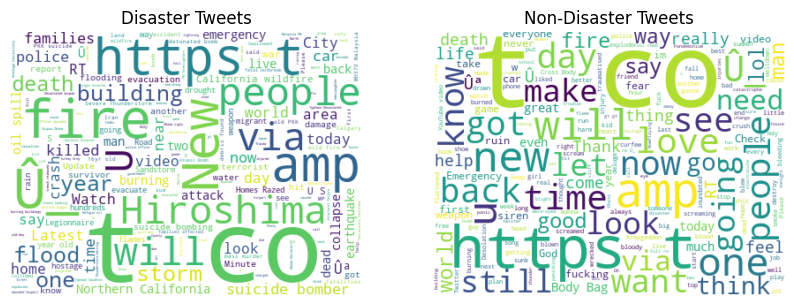

In [13]:
from wordcloud import WordCloud

disaster_tweets = ' '.join(train_data[train_data['target'] == 1]['text'].dropna())
non_disaster_tweets = ' '.join(train_data[train_data['target'] == 0]['text'].dropna())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Disaster Tweets')
wordcloud = WordCloud(width=400, height=300, background_color='white').generate(disaster_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Non-Disaster Tweets')
wordcloud = WordCloud(width=400, height=300, background_color='white').generate(non_disaster_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()


Word Cloud Analysis:

1. Disaster tweets prominently feature terms like "fire", "emergency", "police", and "flood" — highlighting urgent and action-oriented language.
2. Non-disaster tweets contain more neutral or conversational words, suggesting a more casual tone.
3. This confirms that word importance varies between classes, reinforcing the need for proper text vectorization (like TF-IDF).